# Topic Modeling with Google Colab, Gensim and Mallet

This notebook implements [Gensim](https://radimrehurek.com/gensim/) and [Mallet](http://mallet.cs.umass.edu/index.php) for topic modeling using the [Google Colab](https://colab.research.google.com/) platform. The README is available at the [Colab + Gensim + Mallet Github repository](https://github.com/polsci/colab-gensim-mallet).

## Upgrade Gensim

In [1]:
!pip install wget
!pip install spacy
!pip uninstall gensim -y
!pip install gensim==3.8.3

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=1b1e599059aabfa82072c5c54b8f319d8d0883d4eaf0b179d6770539e56d98bb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Uninstalling gensim-3.6.0:
  Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 24.2MB 1.6MB/s 


## Install Java

In [2]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


## Install Mallet

In [20]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-04-09 21:31:21--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  2.41MB/s    in 9.1s    

2021-04-09 21:31:31 (1.69 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestPagedInstanceList.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestRankedFeatureVector.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSerializable$1.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSerializable$WriteMe.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSerializable.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSparseMatrixn.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestSparseVector.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/tests/TestToken.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/Token.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/TokenSequence.class  
  inflating: mallet-2.0.8/class/cc/mallet/types/Vector.class  
   creating: mallet-2.0.8/class/cc/mallet/util/
  inflating: mallet-2.0.8/class/cc/mallet/util/Addable.class  
  inflating: mallet-2.0.8/class/cc/mallet/util

  inflating: mallet-2.0.8/lib/mallet-deps.jar  
  inflating: mallet-2.0.8/lib/mtj-0.9.9.jar  
  inflating: mallet-2.0.8/lib/openjgraph.jar  
  inflating: mallet-2.0.8/lib/trove-2.0.2.jar  
  inflating: mallet-2.0.8/LICENSE    
  inflating: mallet-2.0.8/Makefile   
  inflating: mallet-2.0.8/pom.xml    
  inflating: mallet-2.0.8/README.md  
   creating: mallet-2.0.8/sample-data/
   creating: mallet-2.0.8/sample-data/numeric/
  inflating: mallet-2.0.8/sample-data/numeric/boxes.txt  
  inflating: mallet-2.0.8/sample-data/numeric/puffins.txt  
  inflating: mallet-2.0.8/sample-data/README  
   creating: mallet-2.0.8/sample-data/web/
   creating: mallet-2.0.8/sample-data/web/de/
  inflating: mallet-2.0.8/sample-data/web/de/apollo8.txt  
  inflating: mallet-2.0.8/sample-data/web/de/fiv.txt  
  inflating: mallet-2.0.8/sample-data/web/de/habichtsadler.txt  
  inflating: mallet-2.0.8/sample-data/web/de/hoechst.txt  
  inflating: mallet-2.0.8/sample-data/web/de/indogermanische.txt  
  inflating: m

  inflating: mallet-2.0.8/src/cc/mallet/share/weili/ner/enron/TUI.java  
  inflating: mallet-2.0.8/src/cc/mallet/share/weili/ner/WordTransformation.java  
   creating: mallet-2.0.8/src/cc/mallet/topics/
  inflating: mallet-2.0.8/src/cc/mallet/topics/AbstractTopicReports.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/DMROptimizable.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/DMRTopicModel.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/HierarchicalLDA.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/HierarchicalPAM.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/JSONTopicReports.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/LabeledLDA.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/LDA.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/LDAHyper.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/LDAStream.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/MarginalProbEstimator.java  
  inflating: mallet-2.0.8/src/cc/mallet/topics/M

In [6]:
# !wget https://www.dropbox.com/s/wg4gr4tgy95buoj/out_with_lemma.csv

## Import required libraries for topic modeling

In [7]:
import multiprocessing

import pandas as pd

import spacy

import nltk;
from nltk.corpus import stopwords
nltk.download('stopwords')

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dipta007/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Set the path to the Mallet binary and set the path to the corpus

In [28]:
os.environ['MALLET_HOME'] = './mallet-2.0.8'
mallet_path = './mallet-2.0.8/bin/mallet' # you should NOT need to change this 
corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

In [29]:
df=pd.read_csv('out_with_lemma.csv')

df.head()

,Unnamed: 0,data,tweet_text
0,0,2020-11-23,back bed pneumonia symptom doctor i appointmen...
1,1,2020-11-23,grade exercise be correct advice
2,2,2020-11-23,second vitamin d clinical trial positive resul...
3,3,2020-11-23,graded exercise be advise worryingly say artic...
4,4,2020-11-23,tonight be feature story medical community be ...


In [30]:
len(df)

105821

In [31]:
mdf = df
df = df.dropna(subset=['tweet_text'])
len(mdf), len(df)

(105821, 105453)

In [32]:
stop_words = stopwords.words('english')
stop_words.extend([
                   "something"
])

!python -m spacy download en_core_web_trf

nlp = spacy.load('en_core_web_trf', disable=['parser', 'ner'])

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [33]:
def strip_newline(series):
  return [review.replace('\n','') for review in series]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod  

In [34]:
def get_corpus(df):
    """
    Get Bigram Model, Corpus, id2word mapping
    """
    # df['tweet_text'] = df['tweet_text'].apply(lambda x: x.split())
    df['tweet_text'] = strip_newline(df.tweet_text)
    words = list(sent_to_words(df.tweet_text))
    words = remove_stopwords(words)
    bigram = bigrams(words)
    bigram = [bigram[review] for review in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [35]:
corpus, id2word, bigram = get_corpus(df)

/home/dipta007/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
multiprocessing.cpu_count()

16

In [39]:
def get_model_result(num_topics):
  mallet_model = LdaMallet(mallet_path,
                           corpus=corpus,
                           num_topics=num_topics,
                           id2word=id2word,
                           workers=multiprocessing.cpu_count(),
                          )
  coherence_model_lda = CoherenceModel(model=mallet_model, texts=bigram, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  return coherence_lda, mallet_model

In [41]:
best = 0
best_num = -1
best_model = None
x = []
y = []

for i in range(1, 150, 1):
  curr_val, curr_model = get_model_result(i)
  x.append(i)
  y.append(curr_val)
  if i%10 == 0:
    print(f"Completed {i}")
  if curr_val > best:
    print(f"Found Best Result for {i} with coherence {curr_val}")
    best = curr_val
    best_num = i
    best_model = curr_model

Found Best Result for 1 with coherence 0.2926788260046738
Found Best Result for 5 with coherence 0.2998539489202999
Found Best Result for 6 with coherence 0.3100887377608785
Found Best Result for 7 with coherence 0.3310492865306799
Completed 10
Found Best Result for 10 with coherence 0.35764348074855745
Completed 20
Completed 30
Completed 40
Completed 50
Completed 60
Completed 70
Completed 80
Completed 90
Completed 100
Completed 110
Completed 120
Completed 130
Completed 140


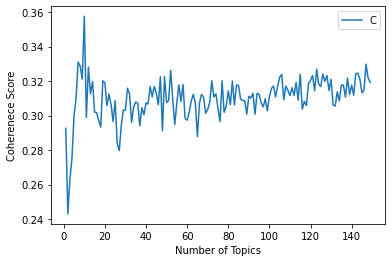

In [42]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('Number of Topics')
plt.ylabel('Coherenece Score')
plt.legend('Coherence Values - MALLET', loc='best')
plt.savefig('./figs/mallet_coherence.png')
plt.show()
# 198


In [43]:
best_model.print_topics(best_num, num_words=20)

[(0,
  '0.188*"month" + 0.138*"people" + 0.130*"infection" + 0.106*"effect" + 0.062*"multi_system" + 0.061*"good_summary" + 0.035*"young" + 0.009*"low_risk" + 0.009*"survivor" + 0.008*"present" + 0.007*"science" + 0.006*"rehab" + 0.006*"population" + 0.006*"initial" + 0.005*"exhausted" + 0.005*"detail" + 0.005*"rate" + 0.005*"lack" + 0.005*"really_amazing" + 0.004*"piece_detail"'),
 (1,
  '0.043*"research" + 0.024*"count" + 0.022*"today" + 0.020*"affect" + 0.017*"treatment" + 0.016*"article" + 0.015*"great" + 0.015*"illness" + 0.014*"lockdown" + 0.014*"lead" + 0.014*"sick" + 0.013*"healthy" + 0.012*"follow" + 0.012*"persistent" + 0.012*"write" + 0.010*"answer" + 0.010*"good" + 0.010*"care" + 0.009*"morbidity" + 0.009*"disease"'),
 (2,
  '0.026*"child" + 0.021*"make" + 0.019*"test" + 0.018*"risk" + 0.015*"thing" + 0.014*"die" + 0.012*"school" + 0.012*"end" + 0.012*"pandemic" + 0.011*"kid" + 0.011*"care" + 0.010*"community" + 0.010*"medical" + 0.010*"lot" + 0.009*"family" + 0.009*"condit

In [44]:
bv, bm = get_model_result(10)

In [45]:
bv

0.320574064689441

In [48]:
bm.print_topics(10, num_words=20)

[(0,
  '0.169*"symptom" + 0.131*"patient" + 0.104*"longcovid" + 0.056*"longhauler" + 0.049*"recovery" + 0.030*"effect" + 0.018*"loss_taste" + 0.017*"survey_report" + 0.017*"worrisome" + 0.017*"mental_problem" + 0.017*"suffer_residual" + 0.017*"smell_many" + 0.017*"focus_brain" + 0.017*"fatigue_inability" + 0.016*"post" + 0.012*"write" + 0.011*"syndrome" + 0.010*"organ_damage" + 0.009*"publish" + 0.009*"show"'),
 (1,
  '0.067*"covid" + 0.035*"study" + 0.032*"coronavirus" + 0.024*"find" + 0.022*"couid" + 0.018*"age" + 0.018*"damage" + 0.017*"long" + 0.016*"disease" + 0.014*"develop" + 0.013*"health" + 0.013*"forget" + 0.012*"chronic" + 0.011*"include" + 0.011*"lung" + 0.010*"answer" + 0.009*"brain" + 0.009*"report" + 0.009*"news" + 0.009*"trend"'),
 (2,
  '0.027*"time" + 0.026*"bad" + 0.025*"important" + 0.020*"read" + 0.018*"take_seriously" + 0.018*"post_viral" + 0.017*"system" + 0.016*"illness" + 0.015*"today" + 0.015*"struggle" + 0.014*"tell_story" + 0.013*"difficult_journey" + 0.013*

In [47]:
set(zip(x, y))

{(1, 0.2926788260046738),
 (2, 0.2429738652730138),
 (3, 0.2630283122080552),
 (4, 0.27520686588745813),
 (5, 0.2998539489202999),
 (6, 0.3100887377608785),
 (7, 0.3310492865306799),
 (8, 0.3287365141321294),
 (9, 0.321180741750165),
 (10, 0.35764348074855745),
 (11, 0.29892230089124733),
 (12, 0.3281144532021116),
 (13, 0.31270253502810175),
 (14, 0.3197572833497376),
 (15, 0.30201663344601504),
 (16, 0.30176740065310703),
 (17, 0.2971890866313495),
 (18, 0.2933569102874324),
 (19, 0.3201337945471177),
 (20, 0.3190749947907063),
 (21, 0.3057813756448395),
 (22, 0.3125268884719474),
 (23, 0.3064288289524441),
 (24, 0.2966493627291354),
 (25, 0.30870448812146384),
 (26, 0.2839132801215318),
 (27, 0.2796650326103636),
 (28, 0.29467400508230873),
 (29, 0.3032969789032689),
 (30, 0.30308505702452515),
 (31, 0.3158810705567227),
 (32, 0.3126730012560235),
 (33, 0.2961585356178378),
 (34, 0.30515255713675926),
 (35, 0.3078821210010752),
 (36, 0.30718189835592263),
 (37, 0.2940763435166085),


In [49]:
!pip install pyLDAvis

import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(bm, corpus, id2word)



# vis = pyLDAvis.gensim.prepare(bm, train_corpus4, train_id2word4)
vis

/home/dipta007/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


AttributeError: 'LdaMallet' object has no attribute 'inference'